<a href="https://colab.research.google.com/github/Juhdiniz/ProjetoProgramacao/blob/master/Secom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Secom: fabricação de semicondutores

## Carregar base de Dados

In [ ]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Seed para reprodução de resultados
seed = 1
random.seed(seed)
np.random.seed(seed)

In [ ]:
data = pd.read_csv('Secom.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [ ]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,590
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1
1566,2944.92,2450.76,2195.4444,2914.1792,1.5978,100.0,85.1011,0.1235,NaN,NaN,...,137.7844,0.4987,0.0181,0.0040,3.6275,0.0117,0.0162,0.0045,137.7844,-1


In [ ]:
data.shape

(1567, 591)

In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,590
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


###Separar input e output

In [ ]:
# output
y_train = data[590]
y_train.head()

,590
0,-1
1,-1
2,1
3,-1
4,-1


In [ ]:
# input
X_train = data.iloc[:, 0:590]  # [0, 590[
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


##Pré Processamento

###Missing

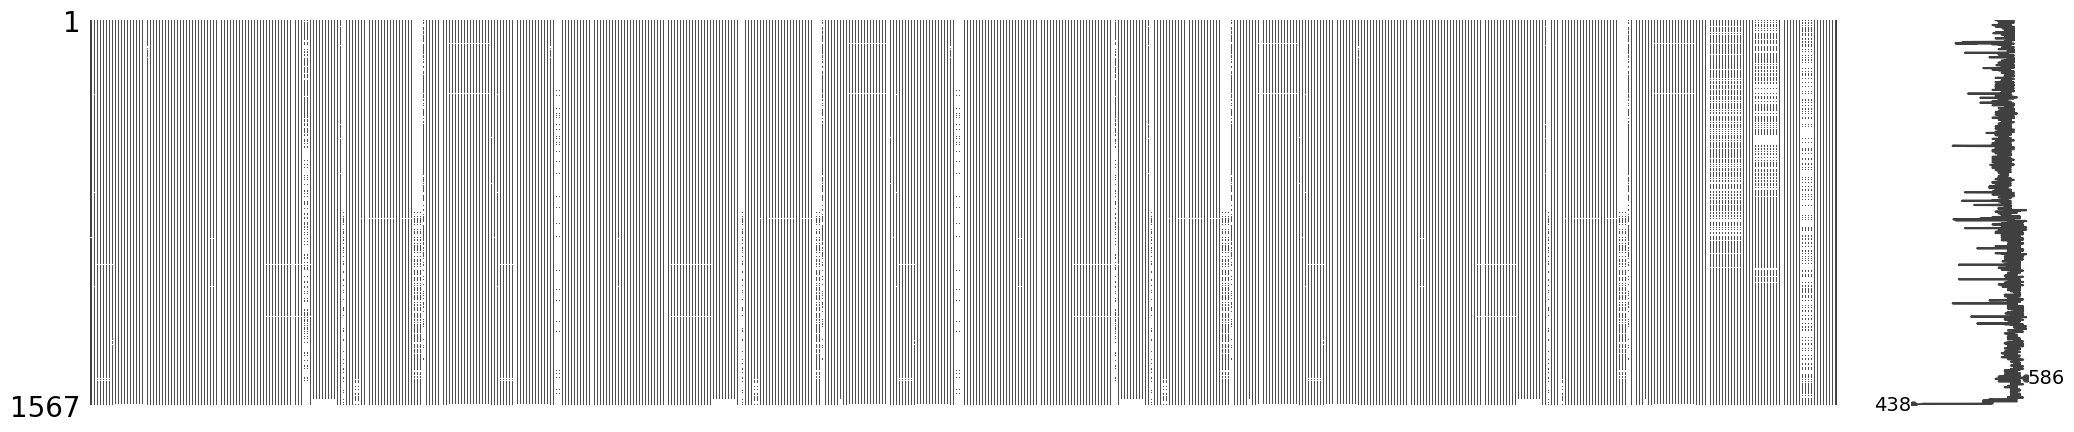

In [ ]:
# Visualizar missing
import missingno as msno
msno.matrix(X_train, figsize=(25,5));

In [ ]:
# Verificar missing por linha
percent_missing_rows = X_train.apply(lambda row: row.isnull().sum() * 100 / X_train.shape[1],
                                     axis=1).sort_values(ascending=False)
df = pd.DataFrame({'row_index': X_train.index, 'percent_missing': percent_missing_rows})
df.head(10)

,row_index,percent_missing
1566,0,25.762712
1564,1,25.084746
1561,2,23.728814
1152,3,16.949153
511,4,16.949153
810,5,16.779661
93,6,16.271186
814,7,16.271186
95,8,16.271186
995,9,15.593220


In [ ]:
# Verificar missing por coluna
percent_missing = X_train.apply(lambda x: x.isnull().sum() * 100 / len(X_train),
                                axis=0).sort_values(ascending=False)
df = pd.DataFrame({'column_idx': X_train.columns, 'percent_missing': percent_missing})
df.head(35)

,column_idx,percent_missing
157,0,91.193363
292,1,91.193363
293,2,91.193363
158,3,91.193363
492,4,85.577537
358,5,85.577537
85,6,85.577537
220,7,85.577537
246,8,64.964901
109,9,64.964901


In [ ]:
# Classe tem missing?
y_train.isnull().sum()

0

In [ ]:
# Atributos com muitos missing: serão deletados.
att_to_delete = df[0:32].index.values
att_to_delete

array([157, 292, 293, 158, 492, 358,  85, 220, 246, 109, 110, 111, 518,
       516, 245, 244, 382, 383, 384, 517, 578, 579, 580, 581, 346,  73,
        72, 345, 112, 247, 385, 519])

In [ ]:
X_train.drop(att_to_delete, axis=1, inplace=True)  # axis = 1 : coluna
X_train.shape

(1567, 558)

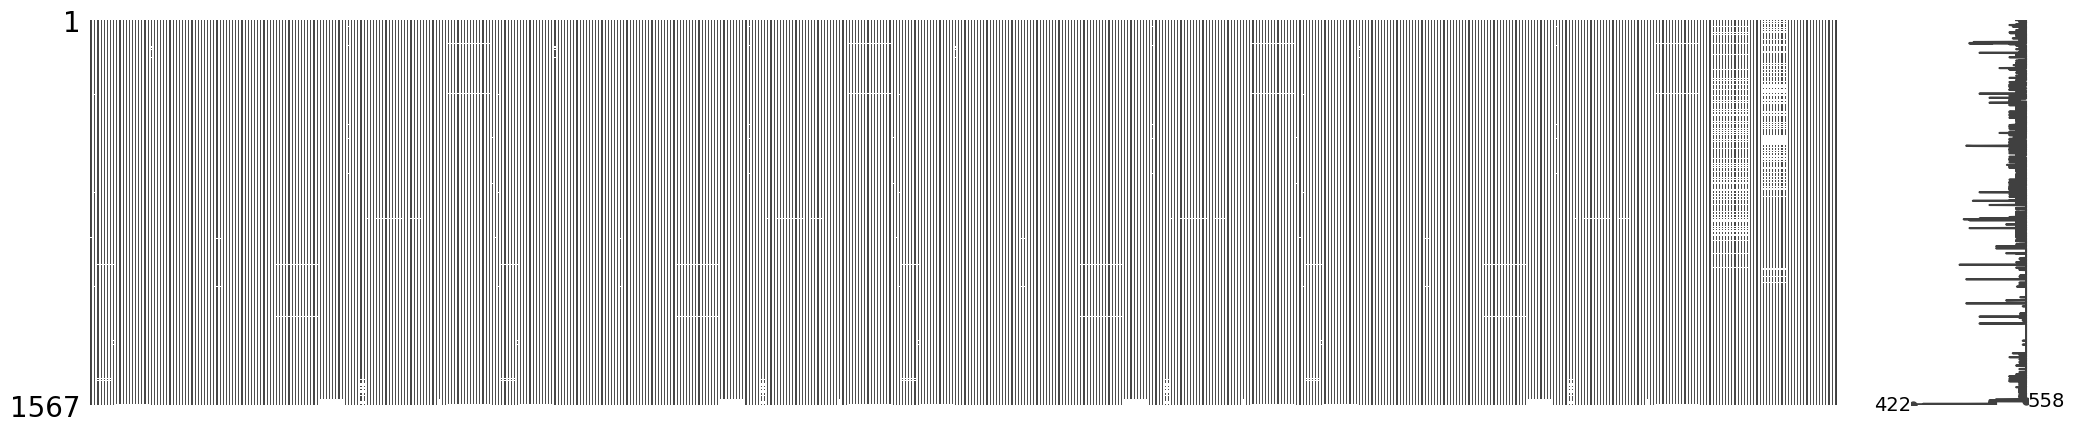

In [ ]:
# visualizar novamente os missing
msno.matrix(X_train, figsize=(25,5));

In [ ]:
# Imputar dados faltantes utilizando a mediana. Testar também o KNNImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")  # crio o imputador
imputer = imputer.fit(X_train)              # faço ajuste do imputador no treino: cálculo da mediana por coluna
X_train = imputer.transform(X_train)        # faz a imputação: colocar a mediana da coluna respectiva nos missings

# X_train = imputer.fit_transform(X_train)  # equivalente às duas últimas linhas

In [ ]:
X_train.shape

(1567, 558)

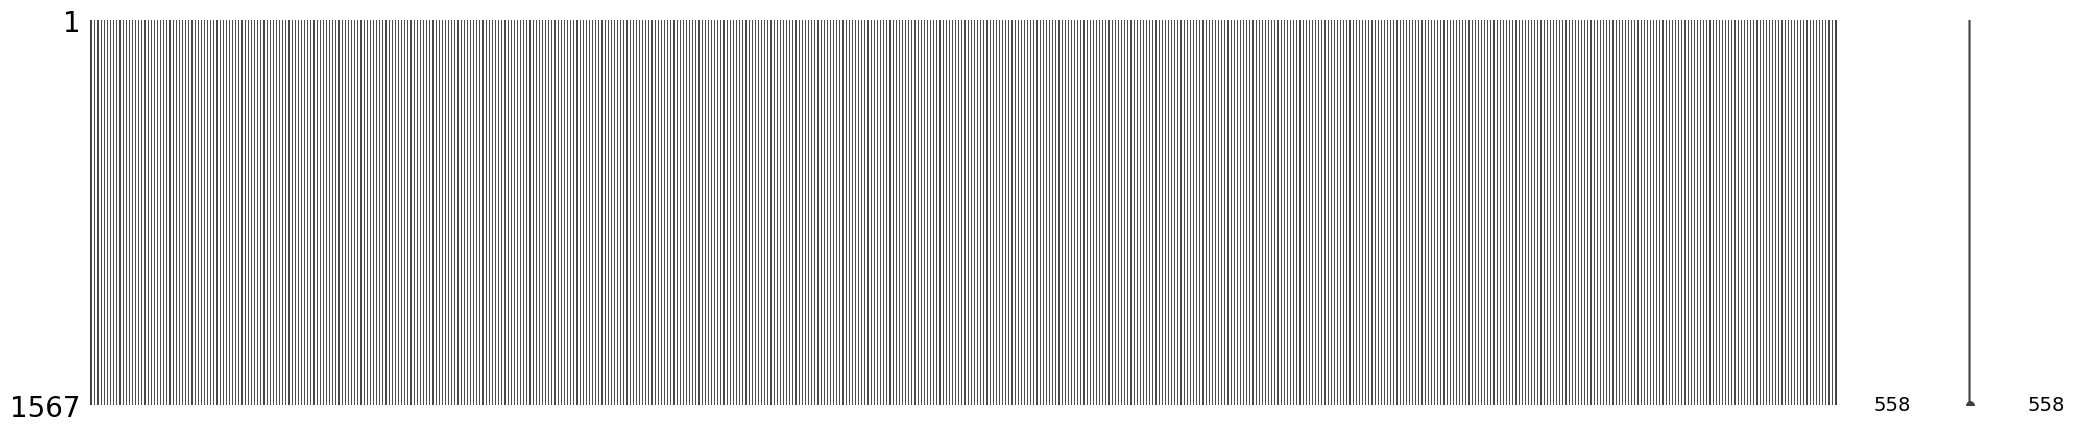

In [ ]:
# visualizar novamente os missing
msno.matrix(pd.DataFrame(X_train), figsize=(25,5));

In [ ]:
# remover colunas com variância zero
from sklearn.feature_selection import VarianceThreshold
zero_var_filter = VarianceThreshold()
X_train = zero_var_filter.fit_transform(X_train)

# OU
# zero_var_filter = zero_var_filter.fit(X_train)
# X_train = zero_var_filter.transform(X_train)

In [ ]:
# colunas com variância zero
(zero_var_filter.variances_ == 0).sum()

116

In [ ]:
# Novo shape
X_train.shape

(1567, 442)

##Machine Learning

In [ ]:
# treinar modelo
from sklearn.svm import LinearSVC

def trainSVM(X_train, y_train, seed):
  model = LinearSVC(max_iter=20_000, random_state=seed)  # crio o modelo
  model.fit(X_train, y_train)                            # treino o modelo
  return model

model = trainSVM(X_train, y_train, seed)

Entrega o resultado, mas reparem que a otimização não convergiu. Alguns motivos nos levam à isso:
1. Dados não normalizados
2. Número de iterações baixo
3. Valores dos hiperparâmetros do modelo
4. Modelo não adequado

### Avaliar modelo treinado na base de teste

In [ ]:
# Carregar base de teste
test = pd.read_csv('Secom_teste.csv', header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,590
0,2940.50,2441.61,2205.2889,1630.3112,1.2733,100,98.8056,0.1218,1.3580,-0.0024,...,61.6014,0.4981,0.0143,0.0038,2.8760,0.0334,0.0206,0.0067,61.6014,-1
1,3065.36,2162.87,2211.3889,1763.4015,1.6569,100,101.9133,0.1212,1.5337,-0.0010,...,44.1754,0.5005,0.0163,0.0039,3.2621,0.0279,0.0123,0.0045,44.1754,-1
2,3038.21,2521.84,2273.7556,1549.8407,1.4105,100,105.0467,0.1171,1.3666,-0.0154,...,NaN,0.4968,0.0126,0.0029,2.5302,0.0279,0.0123,0.0045,44.1754,1
3,2912.76,2480.54,2233.7666,1772.4931,0.9501,100,100.7256,0.1215,1.4029,0.0174,...,170.5841,0.5040,0.0161,0.0043,3.1870,0.0095,0.0162,0.0063,170.5841,-1
4,3091.71,2548.95,2233.7666,1772.4931,0.9501,100,100.7256,0.1215,1.5210,0.0075,...,51.9199,0.5054,0.0127,0.0033,2.5175,0.0315,0.0164,0.0058,51.9199,-1


In [ ]:
test.shape

(213, 591)

In [ ]:
# Separar input e output
X_test = test.iloc[:,0:590]
y_test = test[590]

In [ ]:
# Remover as mesmas colunas removidas do treino (com muitos valores faltantes)
X_test.drop(att_to_delete, axis=1, inplace=True)

# Aplicar tratamento de Missing
X_test = imputer.transform(X_test)

# remover as mesmas colunas removidas por variância zero
X_test = zero_var_filter.transform(X_test)

X_test.shape

(213, 442)

In [ ]:
def predict_and_evaluate(model, X_test, y_test):

  y_pred = model.predict(X_test)  # inferência do teste

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['OK', 'Defeito'])
  ax.yaxis.set_ticklabels(['OK', 'Defeito'])
  plt.show()

Acurácia:  0.9624413145539906
Kappa:  0.32273449920508734


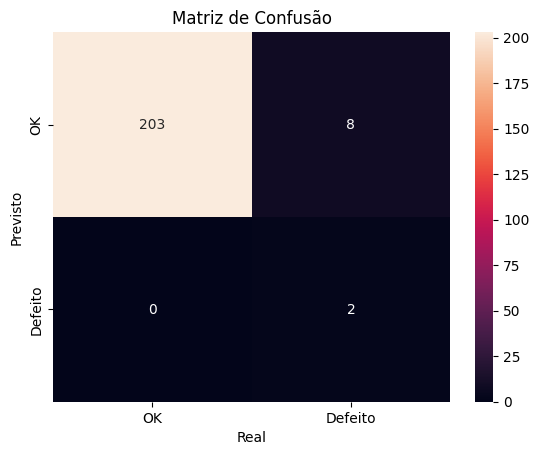

In [ ]:
predict_and_evaluate(model, X_test, y_test)

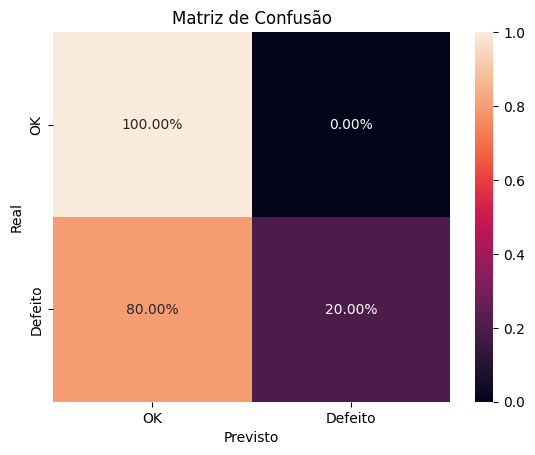

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confMatrix = confusion_matrix(y_test, y_pred, normalize='true')

ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".2%")
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')

# Colocar os nomes
ax.xaxis.set_ticklabels(['OK', 'Defeito'])
ax.yaxis.set_ticklabels(['OK', 'Defeito'])
plt.show()

###Balancear

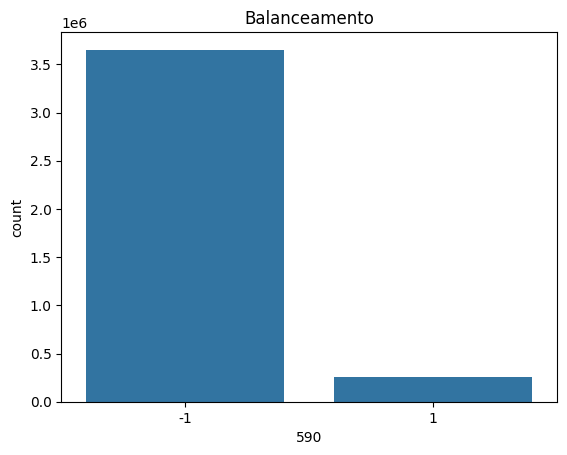

590
-1    1463
 1     104
Name: count, dtype: int64


In [ ]:
# Balanceamento
sns.countplot(data=pd.DataFrame(X_train), x=y_train)
plt.title('Balanceamento')
plt.show()
print(y_train.value_counts())

In [ ]:
# Undersampling aleatório
train_data = np.column_stack((X_train, y_train))  # junto input com output
np.random.shuffle(train_data)                     # embaralho as linhas

ok = train_data[train_data[:, 442] == -1,:]        # separo os registros normais
defeito = train_data[train_data[:, 442] == 1, :]   # separo os registros anômalos

ok = ok[0:1200]  # jogando fora 263 registros dos 1463

train_data = np.concatenate((ok, defeito))  # junta novamente
np.random.shuffle(train_data)               # embaralho
print(train_data.shape)

# Separar input e output
X_train = train_data[:,0:442]
y_train = train_data[:,442]

(1304, 443)


In [ ]:
pd.DataFrame(y_train).value_counts()

,count
0,
-1.0,1200
1.0,104


Acurácia:  0.9624413145539906
Kappa:  0.4128187456926259


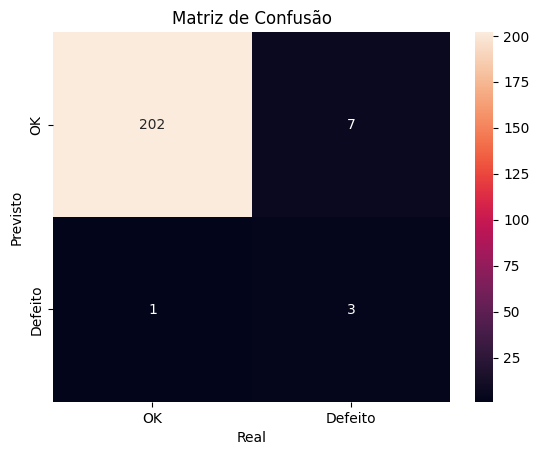

In [ ]:
# treinar e avaliar o modelo
model = trainSVM(X_train, y_train, seed)
predict_and_evaluate(model, X_test, y_test)

###Normalizar

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()     # crio o scaler
scaler = scaler.fit(X_train)  # calcula média e desvio (gera modelo)

X_train = scaler.transform(X_train)  # aplica:  v_linha = (v - mu_treino) / std_treino
X_test = scaler.transform(X_test)    # aplica:  v_linha = (v - mu_treino) / std_treino

In [ ]:
X_train[:,0].mean()

-4.356160967050706e-14

In [ ]:
X_train[:,0].std()

1.0000000000000002

Acurácia:  0.9859154929577465
Kappa:  0.8622547962923044


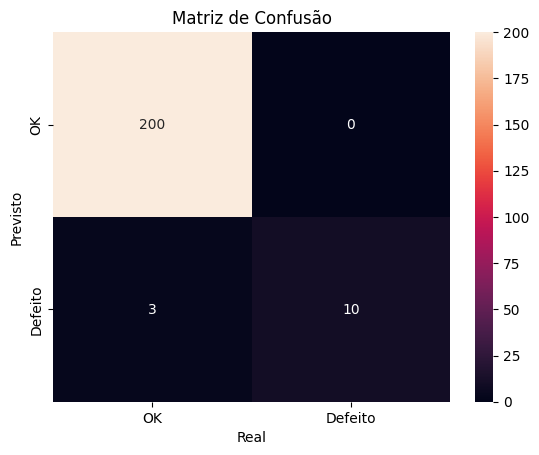

In [ ]:
# treinar e avaliar o modelo
model = trainSVM(X_train, y_train, seed)
predict_and_evaluate(model, X_test, y_test)

###PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()             # crio o modelo
pca = pca.fit(X_train)  # gero o modelo

df = pd.DataFrame(pca.explained_variance_ratio_.cumsum())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # para imprimir tudo
    print(df)

            0
0    0.059503
1    0.097356
2    0.127889
3    0.154944
4    0.177359
5    0.198649
6    0.218830
7    0.238160
8    0.255188
9    0.271102
10   0.285917
11   0.300136
12   0.313982
13   0.327340
14   0.340317
15   0.352553
16   0.364716
17   0.376343
18   0.387590
19   0.398453
20   0.409251
21   0.419925
22   0.430159
23   0.440264
24   0.450202
25   0.460060
26   0.469399
27   0.478528
28   0.487588
29   0.496530
30   0.505374
31   0.513771
32   0.522081
33   0.530194
34   0.538259
35   0.546083
36   0.553787
37   0.561352
38   0.568816
39   0.576161
40   0.583424
41   0.590533
42   0.597492
43   0.604339
44   0.611094
45   0.617723
46   0.624222
47   0.630550
48   0.636840
49   0.642925
50   0.648927
51   0.654896
52   0.660735
53   0.666522
54   0.672245
55   0.677854
56   0.683401
57   0.688732
58   0.694028
59   0.699254
60   0.704406
61   0.709391
62   0.714356
63   0.719231
64   0.724038
65   0.728741
66   0.733332
67   0.737906
68   0.742365
69   0.746799
70   0

In [ ]:
# 214, 430
cut = 350
X_train = pca.transform(X_train)
X_train = X_train[:, 0:cut]
X_train.shape

(1304, 350)

In [ ]:
X_test = pca.transform(X_test)
X_test = X_test[:, 0:cut]
X_test.shape

(213, 350)

Acurácia:  0.9859154929577465
Kappa:  0.8622547962923044


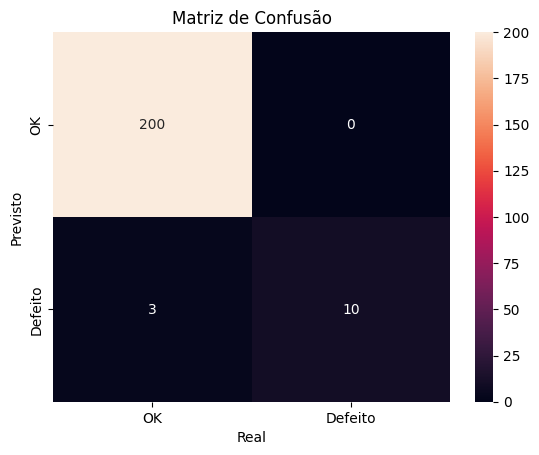

In [ ]:
# treinar e avaliar o modelo
model = trainSVM(X_train, y_train, seed)
predict_and_evaluate(model, X_test, y_test)

Para praticar:

- Testar sklearn.impute.KNNImputer
- Testar outros pontos de corte do pca
- Fazer a normalização antes de tudo!!
- SVM kernel radial (sklearn.svm.SVC)
- https://github.com/scikit-learn-contrib/imbalanced-learn

In [ ]:
# https://github.com/scikit-learn-contrib/imbalanced-learn
# !pip install -U imbalanced-learn
# from imblearn.under_sampling import RandomUnderSampler
# sampler = RandomUnderSampler(sampling_strategy=0.1, random_state=seed);
# X_train, y_train = sampler.fit_resample(X_train, y_train)

# Usar a biblioteca acima é uma opção, podemos configurar o sampling.
# Essa biblioteca tem diversos outros métodos para balanceamento.